In [69]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import torchvision.datasets as D
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../../utils/")
sys.path.append("../")
from torch.utils.data import DataLoader
from utils import MyDataset, Normalize
from tqdm import tqdm
from networks.allaire_net import Allaire_Net
from networks.conv_net import Conv_Net
from networks.conv_net_2 import Conv_Net2
from networks.unet import U_Net
from networks.utils import EarlyStopper
import json
import argparse
import os
import pathlib
import numpy.ma as ma

In [70]:
transform = Normalize(root="../../data")
dataset = MyDataset(root="../../data", tform=transform)
train_dataset, validation_dataset, test_dataset =torch.utils.data.random_split(dataset, [0.8, 0.1, 0.1])
train_loader = torch.utils.data.DataLoader(train_dataset)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=16)
test_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8)

In [87]:
importance = 0.7
FOLDER = pathlib.Path("./attention_maps/ewes")
for item in FOLDER.iterdir():
    fire_number = item.name.split("-")[0]
    file = np.load(f'../../data/backgrounds_400/background_{fire_number}.npz')
    topology = np.concatenate([np.expand_dims(file["a1"], axis=0), np.expand_dims(file["a2"], axis=0), np.expand_dims(file["a3"], axis=0)
                                , np.expand_dims(file["a4"], axis=0), np.expand_dims(file["a5"], axis=0), 
                                np.expand_dims(file["a6"], axis=0), np.expand_dims(file["a7"], axis=0), 
                                np.expand_dims(file["a8"], axis=0)])
    topology = np.where(topology == -9999.0, -1, topology)
    map = plt.imread(f"./attention_maps/ewes/{item.name}")
    filtered = np.where(map > importance, 1, 0)
    print(filtered.shape)
    mx = ma.masked_array(topology, mask=np.stack([filtered]*2, axis=0))
    
    
    

(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)
(400, 400, 4)


KeyboardInterrupt: 

In [54]:
map = plt.imread("./attention_maps/5/1541-1.png")

In [84]:
filtered = np.where(map > importance, map, 0.)

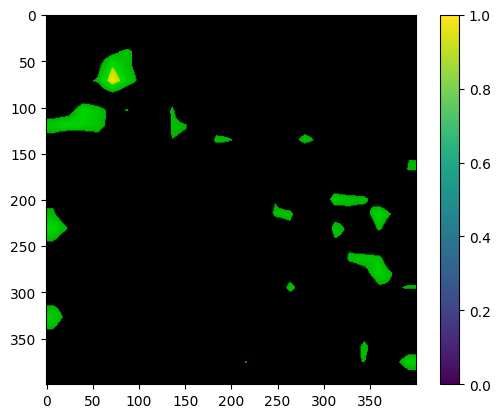

In [85]:
plt.imshow(filtered)
plt.colorbar()

In [58]:
map.shape

(400, 400)